Explore [geo pandas mapping example](https://geopandas.org/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py) with novel corona virus data from [John's Hopkins via Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#time_series_covid_19_confirmed_US.csv).

You need to manually download the data because you need a (free) Kaggle account. Download the Kaggle Covid data set and unpack it into the data/ directory containing this notebook.

Make sure to have [geopandas](https://geopandas.org/install.html) installed for base functionality.  The [descartes](https://pypi.python.org/pypi/descartes) package is needed for plotting the map.

Set up the library imports

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [ ]:
rona_df = pd.read_csv("time_series_covid_19_confirmed_US.csv")

In [ ]:
rona_df.head()

We want to limit our view to the continental United States.  It would be great to have a [bounding box to select just the Latitude and Longitude of interest](https://wiki.openstreetmap.org/wiki/Bounding_Box) but a quick search didn't turn up any numbers to use.  We can get our info by just dropping non-states in the first six rows who have a UID less than 1000 and Alaska and Hawaii from the states. Syntax help from https://stackoverflow.com/a/17071908/8928529.

We can get just state level data for a less granular map by choose the entries with Lat = 0 but this is more complicated to plot since we lose position info. Go ahead and create the data set but ignore it for now. 

In [ ]:
rona_cus_df = rona_df.loc[(rona_df['UID']>1000) &
                          (rona_df['Lat'] > 0) &
                          (~rona_df['Province_State'].isin(['Alaska', 'Hawaii']))
                         ]

In [ ]:
rona_state_df = rona_df.loc[(rona_df['UID']>1000) & 
                            (rona_df['Lat'] == 0) &
                            (~rona_df['Province_State'].isin(['Alaska', 'Hawaii'])) &
                            (~rona_df['Admin2'].isin(['Unassigned', '']))
                           ]

In [ ]:
rona_cus_df.head()

create the geodata frame for plotting

# We need a key to merge on, so I will make CountyState one variable and strip out spaces

In [ ]:
rona_cus_df["County_State"] = rona_cus_df["Admin2"] + rona_cus_df["Province_State"]

rona_cus_df['County_State'] = rona_cus_df['County_State'].str.replace(" ","")

rona_cus_df["County_State"]

# Now read in the population dataset 

In [ ]:
#Kept getting error when importing, solved by adding encoding statement
population = pd.read_csv("pop.csv",encoding='latin-1')

population.head()

# Now strip out the word County to make it match the structure of the other dataset

In [ ]:
population['County_Alone'] = population['CTYNAME'].str.replace('County', '')

In [ ]:
population.head()

In [ ]:
population["County_State"] = population["County_Alone"] + population["STNAME"]

In [ ]:
population.head()

population['County_State'] = population['County_State'].str.replace(" ","")

population.head()

In [ ]:
population = population[['POPESTIMATE2019','County_State']]

In [ ]:
pd.set_option('display.max_rows', None)

population

In [ ]:
Left_join = pd.merge(population,  
                     rona_cus_df,  
                     on ='County_State',  
                     how ='left') 
Left_join 



gdf = geopandas.GeoDataFrame(Left_join ,
                             geometry=geopandas.points_from_xy(Left_join.Long_, Left_join.Lat))


gdf[gdf.Province_State.notnull()]

Now plot the location data on the US contentintal map. (This requires the [descartes](https://pypi.python.org/pypi/descartes) module installed above.)

* Source https://www.mikulskibartosz.name/how-to-change-plot-size-in-jupyter-notebook/


In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

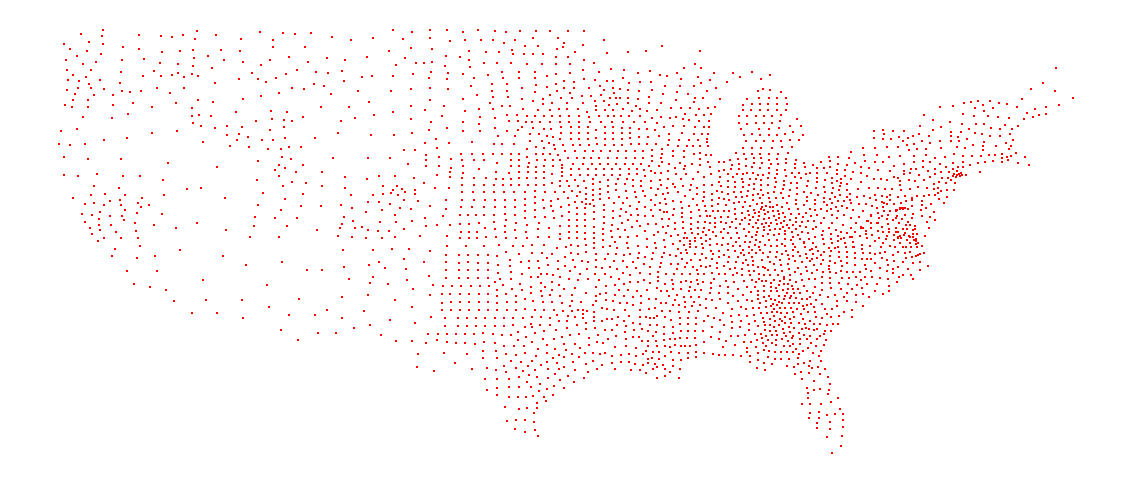

<Figure size 7200x7200 with 0 Axes>

In [84]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to United States
ax = world[world.continent == 'United States'].plot(
    color='white', edgecolor='white')

gdf = geopandas.GeoDataFrame(rona_cus_df,
                             geometry=geopandas.points_from_xy(rona_cus_df.Long_, rona_cus_df.Lat))


gdf.plot(ax=ax, color='red', marker='s',markersize=1)
# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', marker='s',markersize=1)
plt.axis('off')
plt.figure(figsize=(100,100))
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

# Making it work for one

In [ ]:
import warnings
warnings.filterwarnings('ignore')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to United States
ax = world[world.continent == 'United States'].plot(
    color='white', edgecolor='white')

col = '2/8/20'
limit_columns = gdf[['Admin2','Province_State','Lat','Long_',col]]
filter_columns = limit_columns[limit_columns[col] != 0]
lat_long = geopandas.GeoDataFrame(filter_columns,geometry=geopandas.points_from_xy(filter_columns.Long_, filter_columns.Lat))
lat_long.plot(ax=ax, color='red', marker='s',markersize=lat_long[col])
plt.axis('off')
plt.savefig('18.png',dpi=100)
plt.figure(figsize=(100,100))
plt.show()


In [ ]:
i = 1
first_loc = gdf.columns.get_loc("1/22/20")
for col in gdf.columns[first_loc:]:
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    ax = world[world.continent == 'United States'].plot(color='white', edgecolor='white')
    file_name = str(i) + '.png'
    limit_columns = gdf[['Admin2','Province_State','Lat','Long_',col]]
    filter_columns = limit_columns[limit_columns[col] != 0]
    lat_long = geopandas.GeoDataFrame(filter_columns,
                          geometry=geopandas.points_from_xy(filter_columns.Long_, filter_columns.Lat))
    lat_long.plot(ax=ax, color='red', marker='s',markersize=lat_long[col])
    plt.axis('off')
    plt.savefig(file_name,dpi=100)
    plt.figure(figsize=(100,100))
    
    i +=1
      
plt.show()    